# Linear Regression (Bayesian View) I

## Algebra
Besides likelihood which is the key in Frequentist View, prior distribution (as well as posterior) is characteristic of Bayesian View. From "Linear Regression by ML (Frequentist View)", we know that likelihood has the form:

$$
p(\boldsymbol{t}\ |\ X,\boldsymbol{w}, \beta) = \prod_{n=1}^N\mathscr{N}(t_n\ |\ \boldsymbol{w}^T\phi(\boldsymbol{x}_n), \beta)
$$

For simplicity, $\beta$ is regarded as the known, leaving only $\boldsymbol{w}$ to be determined. First of all, a prior is needed for $\boldsymbol{w}$, which will be a conjugate distribution of likelihood:

$$
p(\boldsymbol{w}) = \mathscr{N}(\boldsymbol{w}\  |\ \boldsymbol{m}_0, \boldsymbol{S}_0)
$$

and the posterior will have the form:

$$
p(\boldsymbol{w}\ |\ X, \boldsymbol{t}) = \mathscr{N}(\boldsymbol{w}\  |\ \boldsymbol{m}_N, \boldsymbol{S}_N)
$$

By some algebra:

$$
\begin{align}
\boldsymbol{m}_N &= \boldsymbol{S}_N(\boldsymbol{S}_0^{-1}\boldsymbol{m}_0 + \beta\Phi^T\boldsymbol{t}) \\
\boldsymbol{S}_N^{-1} &= \boldsymbol{S}_0^{-1} + \beta\Phi^T\Phi
\end{align}
$$

where $\Phi$ is an N by M matrix (N is the number of observations and M is the number of basis functions) in the form:

$$
\left(
\begin{matrix}
\phi_1(\boldsymbol{x}_1)&\phi_2(\boldsymbol{x}_1)&\cdots&\phi_M(\boldsymbol{x}_1)\\
\phi_1(\boldsymbol{x}_2)&\phi_2(\boldsymbol{x}_2)&\cdots&\phi_M(\boldsymbol{x}_2)\\
\vdots & \vdots & \ddots & \vdots \\
\phi_1(\boldsymbol{x}_N)&\phi_2(\boldsymbol{x}_N)&\cdots&\phi_M(\boldsymbol{x}_N)\\
\end{matrix}
\right)
$$

Oviously, Bayesian method is naturally a sequential fitting process and below shows this process sequentially with the number of observations increase gradually. 

## Simulation
For simplicity, M is set as 2 (number of basis function) and $\boldsymbol{m}_0=\boldsymbol{0}$, $\boldsymbol{S}_0=\alpha^{-1}\boldsymbol{I}$, then:

$$
\begin{align}
\boldsymbol{m}_N &= \boldsymbol{S}_N\beta\Phi^T\boldsymbol{t}\\
\boldsymbol{S}_N^{-1} &= \alpha\boldsymbol{I} + \beta\Phi^T\Phi
\end{align}
$$

On the right hand side, those blue lines are plotted with the parameters drawn from **posterior** distribution of $\boldsymbol{w}$. With number of observations increases, the blue lines become concentrate around the line plotted with the exact parameters (shown by the red dashed line).

In the same manner, the posterior distribution is plotted on the left hand side. It can be found that it evolves from a "blunt" normal distribution to a "sharp" one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
from scipy.stats import multivariate_normal as mn

WEIGHT, BIAS = 0.7, 0.3

def cal_phi(x_sample, y_sample):
    phi = []
    for i in range(1, -1, -1):
        phi.append(x_sample**i)
    phi = np.array(phi).T
    cov = np.linalg.inv(np.array([[1,0],[0,1]]) + phi.T.dot(phi))
    mean = cov.dot(phi.T).dot(y_sample)
    return mean, cov
    
def sampling(size = 20):
    xx = np.random.uniform(-1,1, size)
    yy = WEIGHT * xx + BIAS + np.random.normal(0, 0.1, len(xx))
    return xx, yy

def sampling_weights_plot(mean, cov, x_sample, y_sample, ax):
    paras = np.random.multivariate_normal(mean, cov, 8)
    x = np.arange(-1, 1, 0.01)
    for w, b in paras:
        y = w*x +b 
        ax.plot(x, y, c="b", linewidth = 1, alpha = 0.5)

    ax.scatter(x_sample, y_sample, s = 200, marker = "o", c = "", edgecolors = "r",linewidth = 2, alpha = 0.8)
    #ax.scatter(x_sample, y_sample, s = 200, marker = "x", c="r", linewidth = 2, alpha = 0.8)
    ax.plot(x, x * WEIGHT + BIAS, linestyle = "dashed",c = "r", linewidth = 5)
    
def sequential_fitting_plot(xx, yy):
    W = np.arange(-1, 1, 0.1)
    B = np.arange(-1, 1, 0.1)
    N = len(W)
    W, B = np.meshgrid(W, B)
    N = len(W)
    X = np.concatenate((np.reshape(W, W.shape+(1,)), np.reshape(B, B.shape+(1,))), axis = 2)
    
    for i in [0, 1, 20, 200]:
        fig =  plt.figure(figsize=(15,7))
        fig.suptitle('Fitting based on {} Obveration'.format(i), fontsize = 20)
        ax = fig.add_subplot(1, 2, 1)
        mean, cov = cal_phi(xx[:i], yy[:i])
        Z = mn(mean,cov).pdf(X)
        levels = MaxNLocator(nbins = 100).tick_values(Z.min(), Z.max())
        ax.contourf(W, B, Z, levels = levels)
        ax.set_xlabel("WEIGHT", fontsize = 15)
        ax.set_ylabel("BIAS", fontsize = 15)       
        ax.scatter([WEIGHT], [BIAS], marker = "x", s = 300, c = "red", linewidth = 3)
        #surf = ax.plot_surface(W, B, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
         #                  linewidth=0, antialiased=False)
        #ax.set_zlim(0, 0.2)
        ax = fig.add_subplot(1, 2, 2)
        sampling_weights_plot(mean, cov, xx[:i], yy[:i], ax)

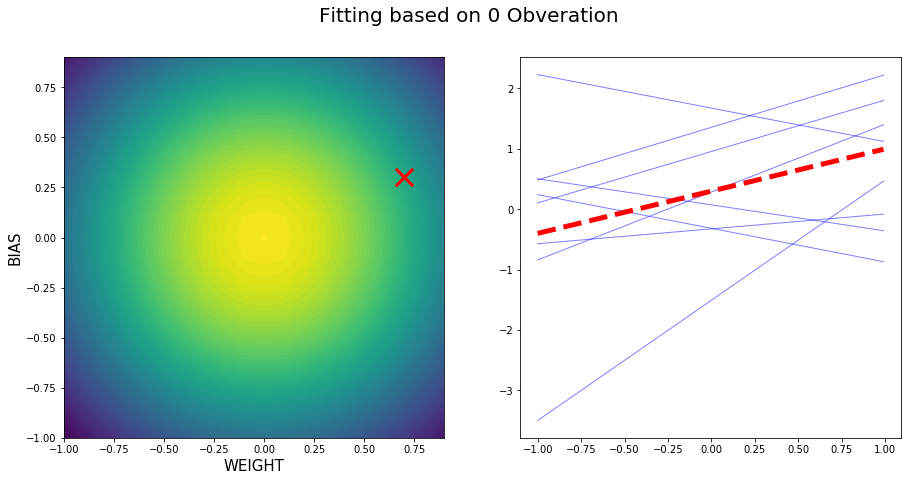

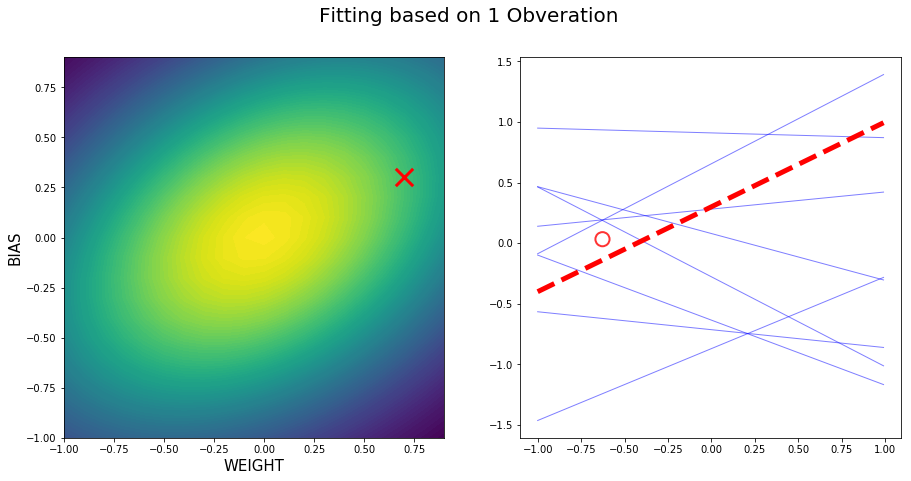

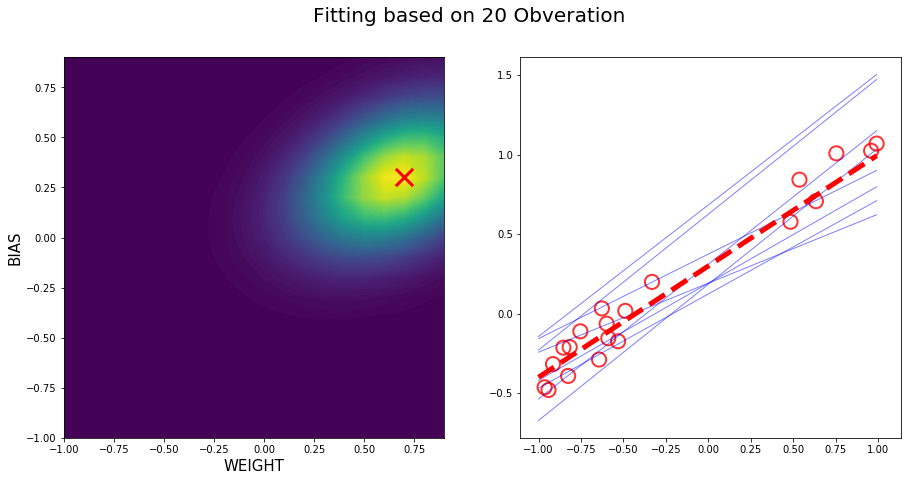

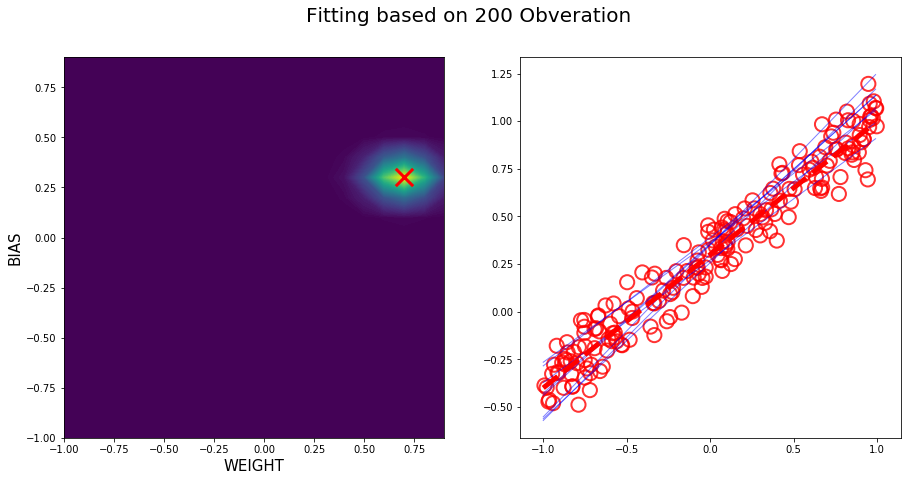

In [2]:
xx, yy = sampling(200)
sequential_fitting_plot(xx, yy)